<a href="https://colab.research.google.com/github/Aman151295/Simple-Linear-Regression/blob/main/Experience_Salary_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
EXSAL_data = pd.read_csv("/content/Salary_Data.csv")
print('Experience & Salary dataset' , EXSAL_data)

Experience & Salary dataset     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [3]:
EXSAL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


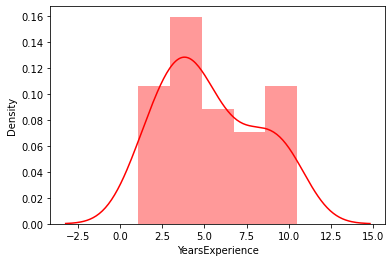

In [5]:
YearsExp = sns.distplot(EXSAL_data['YearsExperience'], kde = True, color ='Red', bins = 5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


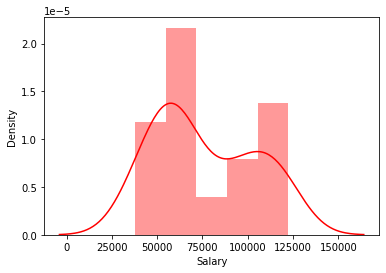

In [6]:
Salary = sns.distplot(EXSAL_data['Salary'], kde = True, color ='Red', bins = 5)

In [7]:
#Correlation Analysis


EXSAL_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]
[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


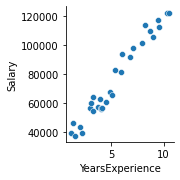

In [12]:
YearsExp_X = np.array(EXSAL_data.iloc[0:30,1]).reshape(-1,1)

print(YearsExp_X)

#

Salary_y = np.array(EXSAL_data.iloc[:,0])
print(Salary_y)

#

sns.pairplot(EXSAL_data, x_vars='YearsExperience' , y_vars = 'Salary' , kind= 'scatter')

In [13]:
## Splitting the dataset into training and test set. 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, Y_train, Y_test = train_test_split(YearsExp_X, Salary_y, test_size = 0.5, random_state =  0)

# fit a model

lm = LinearRegression()
Fitting_data = lm.fit(X_train, Y_train)
print('Fitting_data : ', Fitting_data)

Fitting_data :  LinearRegression()


# Obtain the coefficient of determination (𝑅²) with .score() called on model

In [14]:
lm.score(X_train, Y_train)

0.9560855209637498

**.predict(), you pass the regressor as the argument and get the corresponding predicted response.**

In [16]:
y_pred = lm.predict(X_test)
print('Predicted response:', y_pred, sep='\n')



Predicted response:
[ 1.29549517 10.10927918  3.30998514  3.94889599  9.54480556  8.76003939
  9.09360145  3.17599813  6.01752212  7.91374539  3.26428172  4.2415436
  4.07663651  3.72954041  9.21613658]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


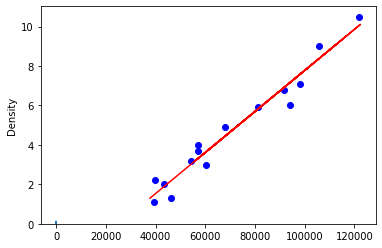

In [23]:
#Visualizing the Test set results  

# Plot a model for True Values & predicted Values, to check how much accurate our model is

sns.distplot(y_pred, kde=True)
plt.scatter(X_train, Y_train, color="blue")   
plt.plot(X_test, y_pred, color="red")    